# Task # 4 (Exploratory Data Analysis)
###Name : Anurag Mhatre
###Reg ID: SIRSS1194

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

# Importing Dataset

In [4]:
df = pd.read_csv("SampleSuperstore.csv")

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

## The dataset has 9994 Rows and 13 Columns

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Checking for missing values

In [ ]:
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

#### No missing values are present

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


   #  Category and Sales

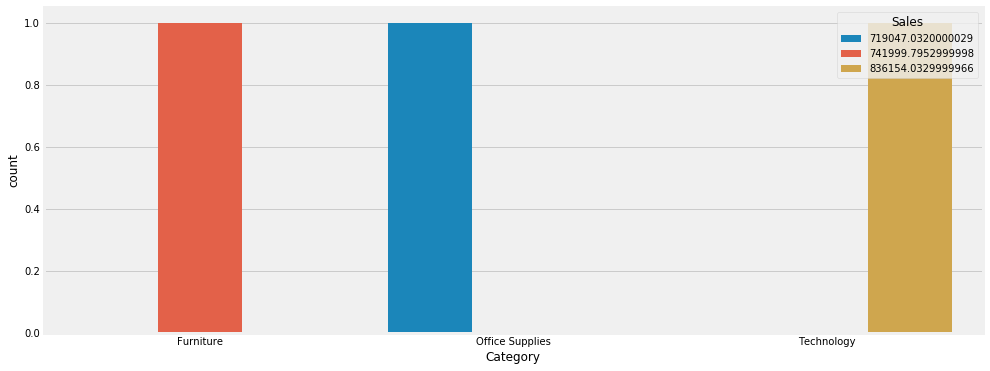

In [ ]:
new_df = df.groupby(["Category"]).Sales.sum().reset_index()
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Category',hue='Sales',data= new_df)


#### Observation : Technology Category has maximum number of Sales

# Discount and Profit Lineplot

Text(0.5, 1.0, 'Discount and Profit')

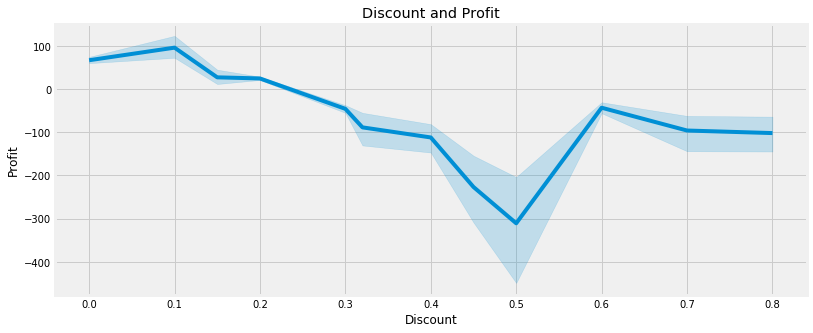

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount and Profit")

#### Observation : The Profit is only posivtive when the discount is less than 10%. After that, it is not profitable to sell there items with discount more than 10%. At 50% discount Most loss is observed .

# Sales and Profit relation Scatterplot

<Figure size 576x432 with 0 Axes>

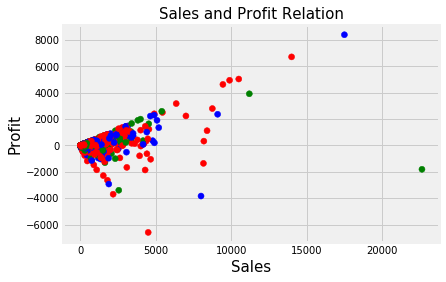

In [ ]:

plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
colors = {'Consumer' : 'red', 'Corporate' : 'blue', 'Home Office' : 'green'}
ax.scatter(df['Sales'], df['Profit'], c=df['Segment'].apply(lambda x: colors[x]))
plt.xlabel("Sales", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title("Sales and Profit Relation", fontsize=15)
plt.show()

#### Observation :There is more profit in consumer segment than corporate and home office segments 



# Discount vs Sales lineplot 

Text(0.5, 1.0, 'Discount VS Sales')

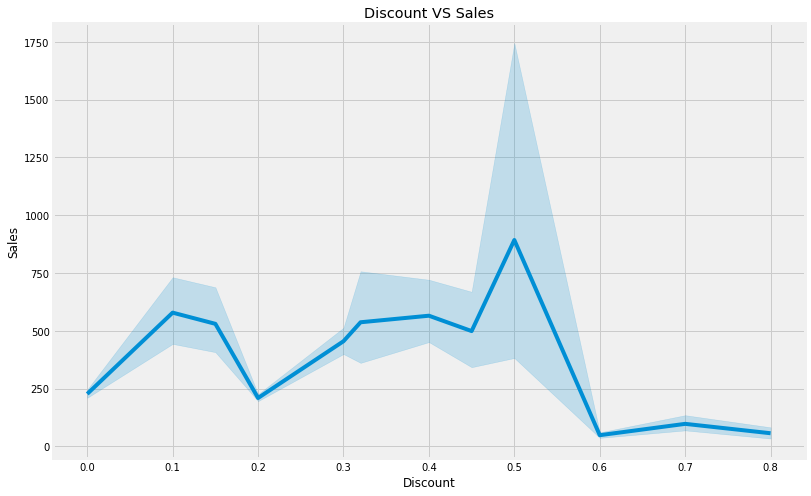

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title('Discount VS Sales')


#### Observation : For maximum sales, discount sholud be less than or equal to 50%.

# Citywise Profit graph

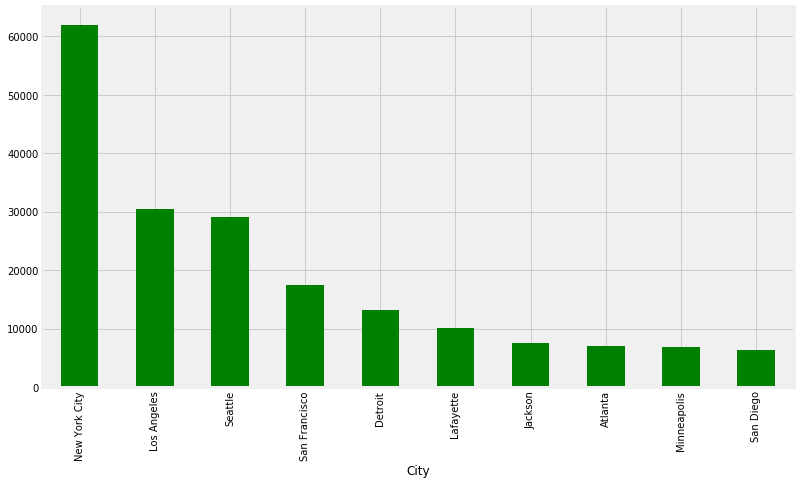

In [ ]:
cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
top = df.groupby('City')['Profit'].sum().nlargest(10)
top.plot(kind='bar', color='g', figsize=(12,7))

In [ ]:
cities.tail()

,City,Profit
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485
374,Philadelphia,-13837.7674


#### Observation : Maximum profit was from New York City and Least was from Philadelphia

# Maximum and minimum profits by subcategories graphs

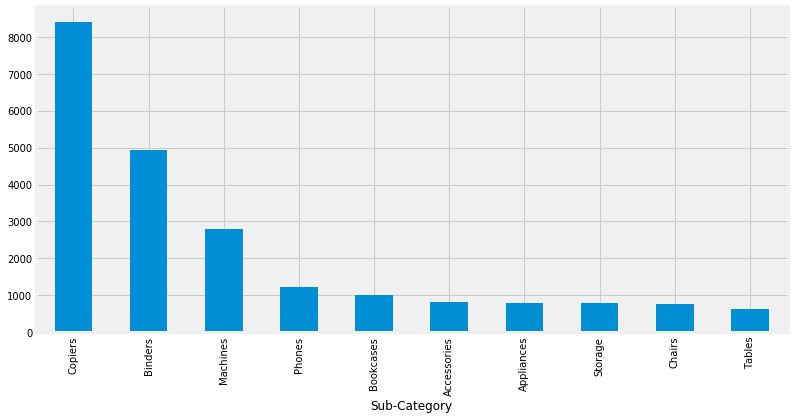

In [ ]:
df.groupby('Sub-Category')['Profit'].max().nlargest(10).plot.bar(figsize=(12,6))


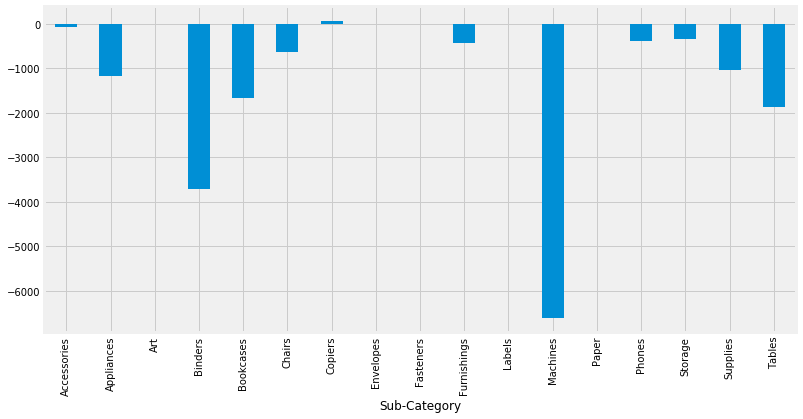

In [ ]:
df.groupby('Sub-Category')['Profit'].min().plot.bar(figsize=(12,6))


#### Observation : Copiers was the most profitable sub-category.


# Regionwise profit

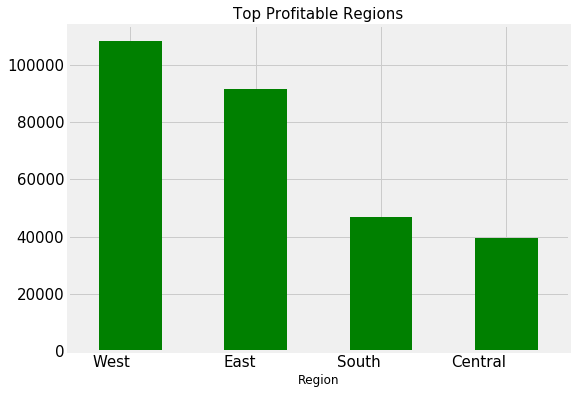

In [ ]:
plt.figure(figsize=(8,6))
reg = df.groupby('Region')['Profit'].sum().nlargest(10)
reg.plot(kind='bar', color='g')
plt.title("Top Profitable Regions", size=15)
plt.xticks(rotation=0, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observation : Western region was most profitable while central was the least.

Data does not have any null value so data cleaning/filling was not needed
State with the maximum profit - California
State with the minimum profit - Texas
City with the maximum profit - New york city
City with the minimum profit - Philadelphia
The region with maximum profits - West
The region with minimum profits and need attention - Central

# Regionwise sales further divided into segments

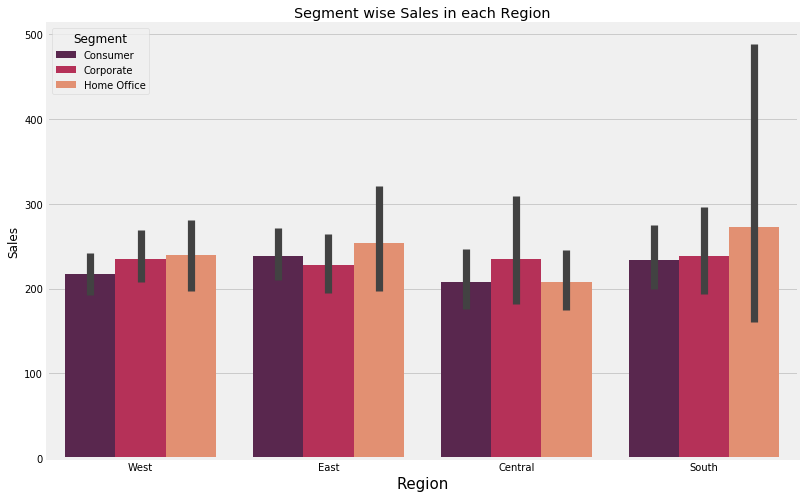

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

#### Observation : Segment wise sales were almost same in all the regions.



# Profit/loss & Sales per Subcategories

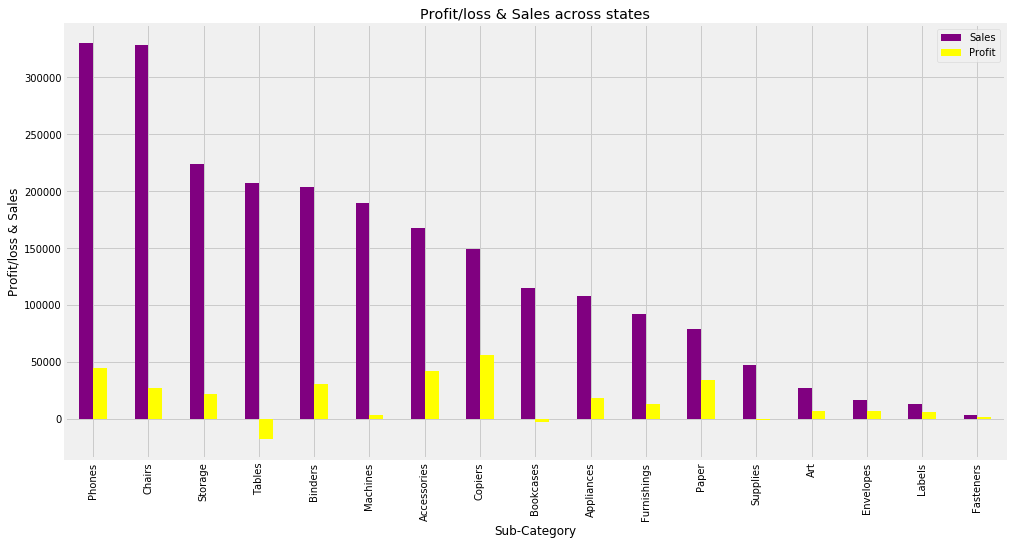

In [ ]:
var = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
var[:].plot.bar(color=['purple','yellow'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

#### Observation : Phones sub-category have maximum sales.Chairs have equal sales as of Phones but less profit. Tables and Bookcases sub-categories are in deep loss.